<a href="https://colab.research.google.com/github/kraigochieng/merge-sort-variations/blob/main/MergeSorts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import random
import time
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [187]:
def merge(left, right):
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    # Append remaining elements from left and right, if any
    for k in range(i, len(left)):
        result.append(left[k])

    for k in range(j, len(right)):
        result.append(right[k])

    return result


def basic_merge_sort(array):
    if len(array) <= 1:
        return array

    mid = len(array) // 2

    left_array = []
    for i in range(mid):
        left_array.append(array[i])

    right_array = []
    for i in range(mid, len(array)):
        right_array.append(array[i])

    left = basic_merge_sort(left_array)
    right = basic_merge_sort(right_array)

    return merge(left, right)


In [188]:
def top_down_merge_sort(data):
    if len(data) <= 1:
        return data

    mid = len(data) // 2

    left = []
    for i in range(mid):
        left.append(data[i])

    right = []
    for i in range(mid, len(data)):
        right.append(data[i])

    left = top_down_merge_sort(left)
    right = top_down_merge_sort(right)

    return merge(left, right)


def merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    for k in range(i, len(left)):
        result.append(left[k])

    for k in range(j, len(right)):
        result.append(right[k])

    return result


In [189]:
def test_merge(
    test_num: int,
    input_size: int
):
  results = {
      "Avg_basic_time" : None,
      "Avg_top_down_time" : None,
      "Input_size" : input_size
  }

  total_basic_time = 0
  total_top_down_time = 0

  for test in range(test_num):
    # 1. Create an array for both merge sorts
    array = list(range(1, input_size+1))
    basic_array = array.copy()
    random.shuffle(basic_array)
    top_down_array = array.copy()
    random.shuffle(top_down_array)
    # print(f"Basic Array : {basic_array} \nTop-Down Array : {top_down_array}")

    # 2. Basic Merge Sort
    basic_start = time.time()
    basic_sorted = basic_merge_sort(basic_array)
    basic_end = time.time()
    basic_duration = basic_end - basic_start

    # 3. Top-Down Merge Sort
    top_down_start = time.time()
    top_down_sorted = top_down_merge_sort(top_down_array)
    top_down_end = time.time()
    top_down_duration = top_down_end - top_down_start

    # 4. Print what's happening
    print(f"Basic Merge Sort Duration : {basic_duration:.4f} || Top-Down Merge Sort Duration : {top_down_duration:.4f}")

    # 5. Update Dictionary
    total_basic_time += basic_duration
    total_top_down_time += top_down_duration

  results["Avg_basic_time"] = total_basic_time / test_num
  results["Avg_top_down_time"] = total_top_down_time / test_num

  # 6. Return results
  # print(f"First 10 values: {basic_sorted[:10]} || Last 10 values: {basic_sorted[-10:]}")
  return results




In [190]:
def input_size_init(
    tests_per_input_size: int,
):
  # 1. Input the test sizes
  sizes = [10, 50, 100, 200]

  # 2. Initialize a dictionary to store the averages and their corresponding input_size
  new_results = {
      "basic_time_avg" : [],
      "top_down_time_avg" : [],
      "input_size" : []
  }

  # 3. Get the averages per input size
  for num in tqdm(range(len(sizes))):
    print(f"Test: {num + 1} | Input Size: {sizes[num]}\n--------")
    time_results = test_merge(
        test_num = tests_per_input_size,
        input_size = sizes[num]
    )
    new_results["basic_time_avg"].append(time_results["Avg_basic_time"])
    new_results["top_down_time_avg"].append(time_results["Avg_top_down_time"])
    new_results["input_size"].append(time_results["Input_size"])
    print("\n")

  return new_results


In [197]:
# Get time averages per input size
time_averages_per_size = input_size_init(
    tests_per_input_size = 10,
)

  0%|          | 0/4 [00:00<?, ?it/s]

Test: 1 | Input Size: 10
--------
Basic Merge Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0000 || Top-Down Merge Sort Duration : 0.0001
Basic Merge Sort Duration : 0.0000 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0000 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0001 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0000 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0000 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0000 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0000 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0000 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0000 || Top-Down Merge Sort Duration : 0.0000
Basic Merge Sort Duration : 0.0000 || Top-Down Merge S

In [198]:
time_averages_per_size.keys()

dict_keys(['basic_time_avg', 'top_down_time_avg', 'input_size'])

In [199]:
averages_df = pd.DataFrame(time_averages_per_size)
averages_df

,basic_time_avg,top_down_time_avg,input_size
0,0.000044,0.000038,10
1,0.002605,0.000260,50
2,0.000682,0.002010,100
3,0.002033,0.005636,200


In [200]:
basic_time_avg = time_averages_per_size["basic_time_avg"]
length = len(basic_time_avg)
length

4

In [201]:
def plot_durations(
    results: dict[str, list[float]]
):
  """Plot the durations of Basic and Top-Down Merge Sorts"""
  # Get the values from the dictionary
  basic_time_avg = results["basic_time_avg"]
  top_down_time_avg = results["top_down_time_avg"]
  input_size = results["input_size"]
  # length = range(len(basic_time_avg))

  # Set the figure size
  plt.figure(figsize=(8, 6))

  # Plot the durations
  plt.plot(input_size, basic_time_avg, label = "Basic Merge Sort Time Average", marker='o')
  plt.plot(input_size, top_down_time_avg, label = "Top-Down Merge Sort Time Average", marker='o')
  plt.title("Basic and Top-Down Merge Sorts Average Durations")
  plt.xlabel("Number of Input Sizes")
  plt.legend()

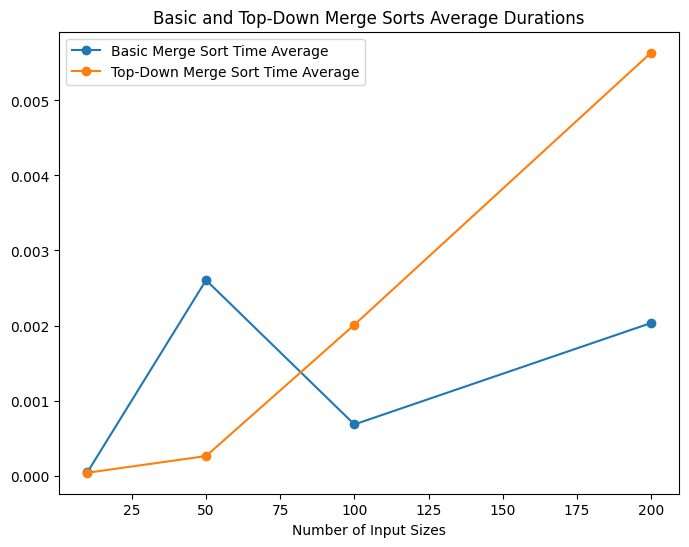

In [202]:
plot_durations(time_averages_per_size)